In [1]:
from ParseFetches import ParseFetches
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SN = '329744001'
dateFrom = '2021-08-21T05:15:00.000Z'
dateTo = '2021-08-21T05:18:00.000Z'

#deviceCode = 'SONARDYNEFETCH8306SN329744001' # AZA
deviceCode = 'SONARDYNEFETCH8306SN329742001' # Fetch North
#deviceCode = 'SONARDYNEFETCH8306SN329742002' # Fetch East

fetcher = ParseFetches(SN,deviceCode,dateFrom,dateTo)
df = fetcher.getONCRawData()



In [3]:
df.head()

,lines
Timestamp,
2021-08-21 05:15:00.798000+00:00,"%2201,TIM,253,6,2021,08,21,05,15,00*31"
2021-08-21 05:15:03.345000+00:00,"%2201,TMP,1,11,4,257,5.7882*C4"
2021-08-21 05:15:10.293000+00:00,"%2201,INC,3,25,1,259,1.9500,3.4219*33"
2021-08-21 05:15:12.417000+00:00,"%2201,DQZ,2,15,3,258,4235.7339,6.0374*31"
2021-08-21 05:15:18.802000+00:00,"%2201,PIES,8,42,3,258,3,2021,08,21,05,15,11,42..."


In [6]:
df = fetcher.parseData()

                                                                     lines  \
Timestamp                                                                    
2021-08-21 05:15:12.417000+00:00  %2201,DQZ,2,15,3,258,4235.7339,6.0374*31   
2021-08-21 05:16:12.415000+00:00  %2201,DQZ,2,15,3,258,4235.7847,6.0371*8D   
2021-08-21 05:17:12.412000+00:00  %2201,DQZ,2,15,3,258,4235.8721,6.0384*53   

                                  TMP_Temp  
Timestamp                                   
2021-08-21 05:15:12.417000+00:00       NaN  
2021-08-21 05:16:12.415000+00:00       NaN  
2021-08-21 05:17:12.412000+00:00       NaN  


In [ ]:
#df.to_parquet('/Users/schlesin/Library/CloudStorage/GoogleDrive-schlesin@oceannetworks.ca/My Drive/ONC Projects/Activefolder_Mac/Instrument Informations/SonardyneFetches/Barkley_AZA/SonardyneAZA_2021_2023.parquet')

In [ ]:
# read in parquet
#df= pd.read_parquet('/Users/schlesin/Library/CloudStorage/GoogleDrive-schlesin@oceannetworks.ca/My Drive/ONC Projects/Activefolder_Mac/Instrument Informations/SonardyneFetches/Barkley_AZA/SonardyneAZA_2021_2023.parquet')



In [7]:
df.keys()

Index(['lines', 'TMP_Temp', 'DQZ_Press', 'DQZ_Temp', 'INC_Pitch', 'INC_Roll',
       'PIES_PRESS', 'PIES_TOF', 'PIES_Mag', 'PIES_RMLE_TOF', 'PIES_Halflife',
       'PIES_RMS', 'PIES_RMLE_Range', 'PIES_Peak', 'KLR_PRESS', 'KLR_Temp',
       'AZA_PRESS_PRIM', 'AZA_Temp_PRIM', 'AZA_PRESS_KLR', 'AZA_Temp_KLR',
       'AZA_PRESS_Low', 'AZA_Temp_Low', 'AZA_RMS_ERROR', 'AZA_Settling',
       'AZA_ERROR_REPORT', 'AZS_PRESS_PRIM', 'AZS_Temp_PRIM', 'AZS_PRESS_SEC',
       'AZS_Temp_SEC', 'AZS_PRESS_Low', 'AZS_Temp_Low'],
      dtype='object')

In [7]:
df

,DQZ_Press,DQZ_Temp,KLR_PRESS,KLR_Temp
Timestamp,,,,
2021-08-21 05:15:00.798000+00:00,NaN,NaN,NaN,NaN
2021-08-21 05:15:03.345000+00:00,NaN,NaN,NaN,NaN
2021-08-21 05:15:10.293000+00:00,NaN,NaN,NaN,NaN
2021-08-21 05:15:12.417000+00:00,423.57339,6.0374,NaN,NaN
2021-08-21 05:15:18.802000+00:00,423.57339,6.0374,NaN,NaN
2021-08-21 05:16:00.796000+00:00,423.57339,6.0374,NaN,NaN
2021-08-21 05:16:03.343000+00:00,423.57339,6.0374,NaN,NaN
2021-08-21 05:16:10.291000+00:00,423.57339,6.0374,NaN,NaN
2021-08-21 05:16:12.415000+00:00,423.57847,6.0371,NaN,NaN


array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

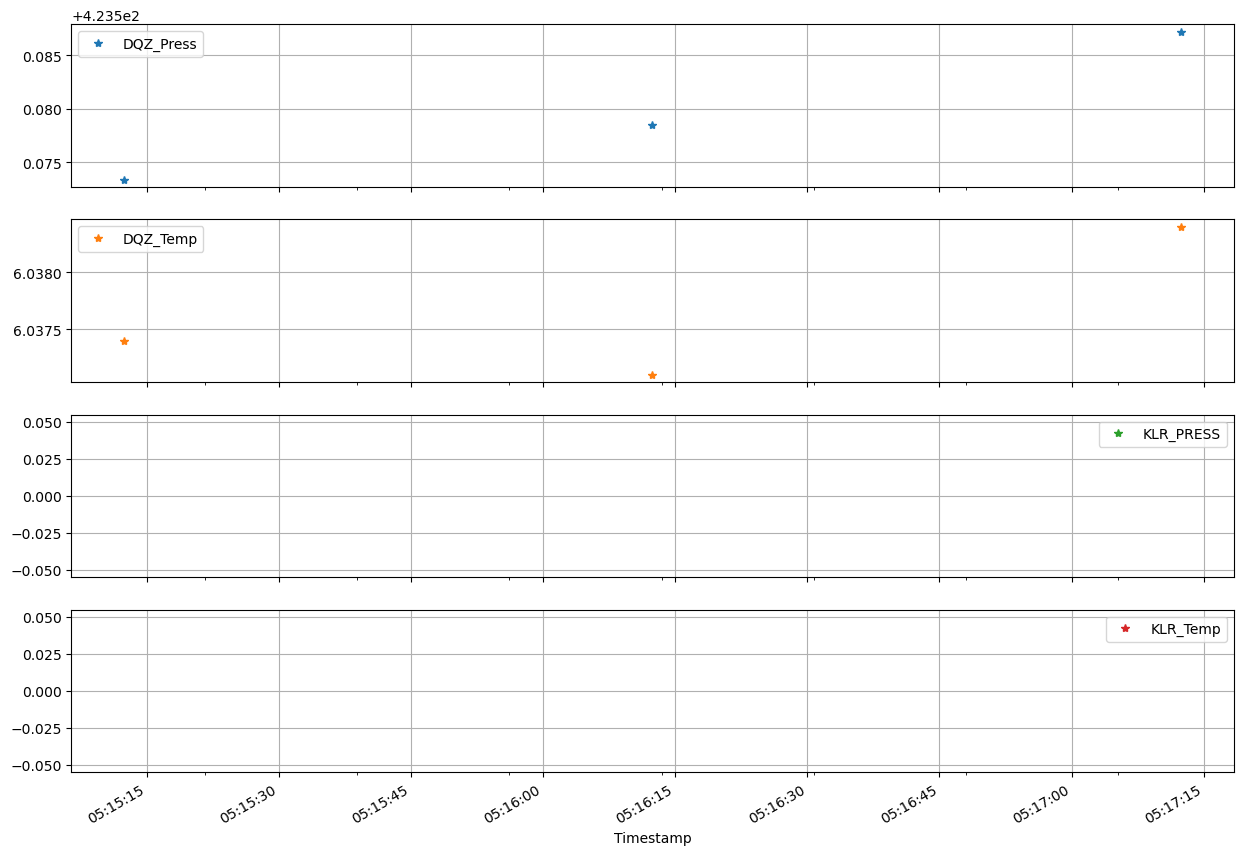

In [8]:
df = df[['DQZ_Press','DQZ_Temp','KLR_PRESS','KLR_Temp']]
df.plot(subplots=True,sharex=True, marker='*',linewidth=0,figsize=[15,11],grid=True)

### Resample pressure readings

In [25]:
DQZ_15min=df['DQZ_Press'].resample('15min').mean()
KLR_15min =df['KLR_PRESS'].resample('15min').mean()



# Sensor Readings

The wired Fetch units have been adapted to output each sensor reading as an unsolicited ASCII serial message after the data has been stored to the SD card. Each record type has a common header format, but different sensor data format, as described below.

Each log event will start with a `TIME` message that contains the local date time for each message. Note that multiple sensor messages can follow one `TIME` message, and the date time applies to all the following sensor readings. This allows multiple sensor readings to be made concurrently in the Fetch without bloating the SD card with duplicated date time records. Start character is `%` and the cyclic redundancy check (CRC) is appended following a comma at the end of the last data field preceded by a `*` character. 

Sensor message types are as follows:

## TMP (1): Temperature record
Temperature data from the Platinum Resistance Thermometer Pt100 (PRT) sensor.

**Example:** `%4,TMP,1,11,4,257,19.7653*7F`

* `%` start character
* `4` DAS ID
* `TMP,1` data type 1, Temperature
* `11` number of following characters
* `4` module position number
* `257` module type = PRT
* `19.7653` temperature in degC
* `*` CRC prefix
* `7F` CRC

---

## DQZ (2): Pressure and temperature record
Reading from the Digiquartz pressure sensor.

**Example:** `%4,DQZ,2,15,3,258,104.0387,19.1026*C2`

* `%` start character
* `4` DAS ID
* `DQZ,2` data type 2, Digiquartz pressure & temperature
* `15` number of characters
* `3` Module position number
* `258` Module Type
* `104.0387` pressure (kPa)
* `19.1026` temperature (degC)
* `*` CRC prefix
* `C2` CRC

---

## KLR (2): Pressure and temperature record
Reading from the Keller pressure sensor (for the AZA Fetch only, model 8306-9925).

**Example:** `%4,KLR,2,15,5,770,100.7423,20.7199*BD`

* `%` start character
* `4` DAS ID
* `KLR,2` data type 2, Keller pressure & temperature
* `15` number of characters
* `5` Module position number
* `770` Module Type
* `100.7423` pressure (kPa)
* `20.7199` temperature (degC)
* `*` CRC prefix
* `BD` CRC

---

## INC (3): Inclinometer/accelerometer sensor
From internal MEMS sensor.

**Example:** `%4,INC,3,23,1,259,-0.5063,0.2000*82`

* `%` start character
* `4` DAS ID
* `INC,3` data type 3, Inclinometer
* `23` Number of characters
* `1` Module ID
* `259` Module Type
* `-0.5063` Inclinometer Pitch in degrees
* `0.2000` Inclinometer Roll in degrees (no polarity sign if positive)
* `*` CRC Prefix
* `82` CRC

---

## AZS (6): AZS report
AZA Status report, typically occurs at the start and end of an AZA cycle (and may also occur in the event of an error), book-ending the 3 AZA readings at high-low-high pressure.

**Example:** `%4,AZS,6,39,2,262,4001,-27623,100.9894,20.6557,98.6875,20.7417,117.5620,-9999.0000,4,16*CA`

* `%` start character
* `4` DAS ID
* `AZS,6` data type 6
* `39` number bytes
* `2` module number
* `262` module type
* `4001` Report point / error number (-ve if error). 
* `-27623` Control module status word
* `100.9894` Pressure in kPa (Primary, transfer sensor, DQZ)
* `20.6557` Temperature in degrees C (Primary, transfer sensor, DQZ)
* `98.6875` Pressure in kPa (Secondary, ambient sensor, KLR)
* `20.7417` Temperature in degrees C (Secondary, ambient sensor, KLR)
* `117.5620` Pressure in kPa (Low pressure sensor)
* `-9999.0000` Temperature in degrees C (Low pressure sensor always -9999.0000)
* `4` Bit mask for primary, transfer pump, sensor module
* `16` Bit mask for secondary, ambient, sensor module
* `*` CRC prefix
* `CA` CRC

---

## AZA (7): Extended AZA reports
Occurs 3 times during a typical AZA cycle: once with the DQZ at high (ambient) pressure, once when the DQZ has been lowered to 1 bar (zero) and a final time once it is back to high (ambient) pressure.

**Example:** `%4,AZA,7,49,2,262,4023,-32743,102.8574,19.2645,108.4892,19.2517,117.2530,-9999.0000,0.0000,-0.0039,88,4,16*3F`

* `%` start character
* `4` DAS ID
* `AZA,7` data type
* `49` number of bytes
* `2` module number
* `262` module ID
* `4023` Time in 1/10 seconds since start of AZA sequence
* `-32743` Report point / error number (-ve if error)
* `102.8574` Pressure in KPa (Primary, transfer sensor, DQZ)
* `19.2645` Temperature in degrees C (Primary, transfer sensor, DQZ)
* `108.4892` Pressure in KPa (Secondary, ambient sensor, KLR)
* `19.2517` Temperature in degrees C (Secondary, ambient sensor, KLR)
* `117.2530` Pressure in KPa (Low pressure sensor)
* `-9999.0000` Temperature in degrees C (Low pressure sensor)
* `0.0000` Mean square error value from settling calculation
* `-0.0039` Rate of change from settling calculation
* `88` Samples to go till abandoning check for settled data
* `4` Bit mask for primary, transfer pump, sensor module
* `16` Bit mask for secondary, ambient, sensor module
* `*` CRC prefix
* `3F` CRC

---

## PIES (8): PIES data record
Pressure Inverted Echo Sounder measurement.

**Example:** `%4,PIES,8,42,3,258,3,2021,02,17,17,21,27,101.7718,0.0300,781.1178,0.1183,1592.4653,65.3777,42.5273,0.0001*9A`

* `%` start character
* `4` DAS ID
* `PIES,8` data type
* `42` number bytes
* `3` PIES Pressure Module Number
* `258` PIES Pressure Module Type (258 = DQZ)
* `3` PIES calculation version
* `2021` Year
* `02` Month
* `17` Day
* `17` Hour
* `21` Minute
* `27` Second
* `101.7718` Pressure module reading (in kPa)
* `0.0300` Cross-Correlated Time of Flight (in Seconds)
* `781.1178` Magnitude
* `0.1183` RMLE Statistical Time of Flight (in Seconds)
* `1592.4653` Half Life
* `65.3777` RMS
* `42.5273` RMLE Range
* `0.0001` Peak Position
* `*` CRC prefix
* `9A` Checksum

---

## TIM (253): Time and Date
A Time message is generated at the start of each scheduled event time. There may be more than one sensor message following the Time message.

**Example:** `%4,TIM,253,6,2021,02,25,16,06,37*70`

* `%` start character
* `4` DAS ID
* `TIM,253` data type, Time
* `6` number bytes
* `2021` Year
* `02` Month
* `25` Day
* `16` Hour
* `06` Minute
* `37` Seconds
* `*` CRC prefix
* `70` CRC

<Axes: xlabel='Timestamp'>

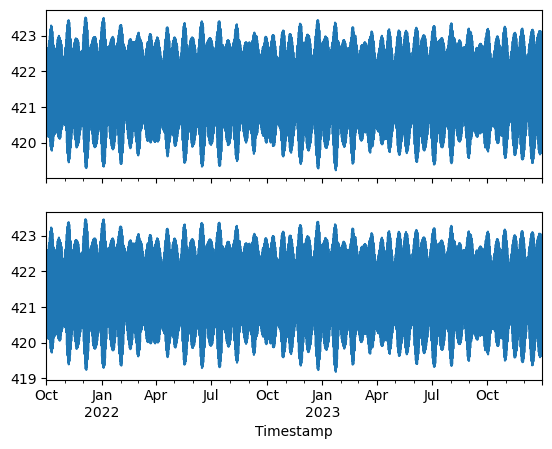

In [28]:
fig,axs = plt.subplots(2,1,sharex=True)
KLR_15min.plot(ax=axs[0],label='Keller Pressure')
DQZ_15min.plot(ax=axs[1],label = 'Digiquartz Pressure')

### Plot the individual readings

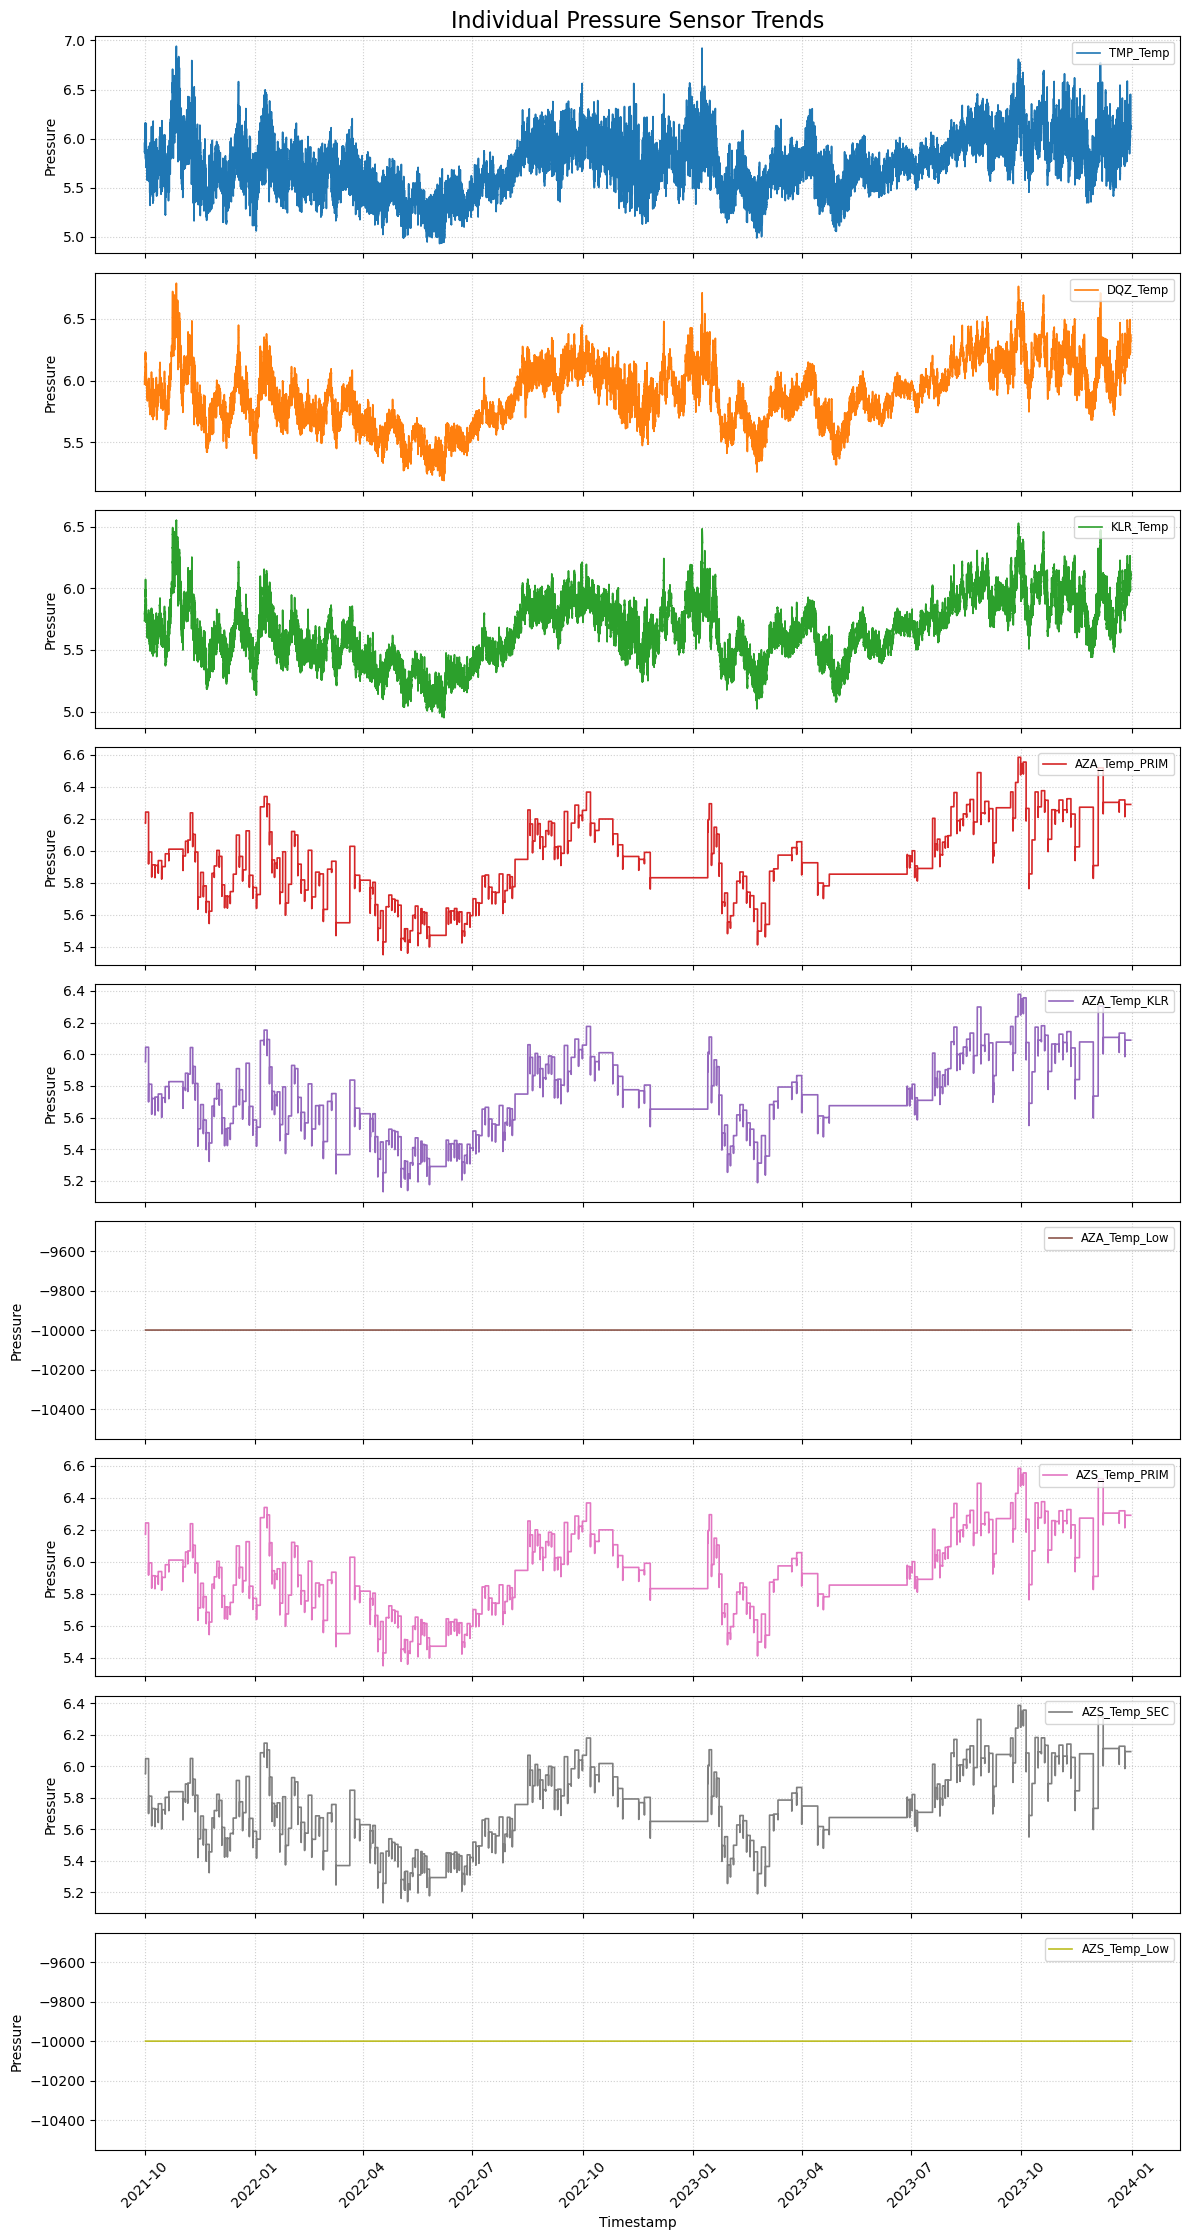

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Identify all pressure-related columns
press_cols = [col for col in df.columns if 'TEMP' in col.upper()]

# 2. Create subplots (one row for each column)
n = len(press_cols)
fig, axes = plt.subplots(n, 1, figsize=(12, 2.5 * n), sharex=True)

# Ensure 'axes' is an array even if there's only one plot
if n == 1:
    axes = [axes]

for i, col in enumerate(press_cols):
    ax = axes[i]
    # Drop NaNs to ensure the line connects through data points
    data = df[col].dropna()
    
    if not data.empty:
        # 'C'+str(i) cycle through standard matplotlib colors
        ax.plot(data.index, data, label=col, color=f'C{i%10}', linewidth=1.2)
        
    # Formatting each subplot
    ax.set_ylabel('Pressure')
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(True, linestyle=':', alpha=0.6)

# Final global formatting
axes[0].set_title('Individual Pressure Sensor Trends', fontsize=16)
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the result
#plt.savefig('pressure_sensors_comparison.png')

# ----------

# This is now in ParseFetches.py

In [ ]:
# --- TMP Extraction ---
# Filter by column 1 (the tag) and grab column 6 (the value)
tmp_mask = df_split[1] == 'TMP'
df.loc[tmp_mask, 'TMP_Temp'] = df_split.loc[tmp_mask, 6].str.split('*').str[0].astype(float)

# --- DQZ Extraction ---
dqz_mask = df_split[1] == 'DQZ'
df.loc[dqz_mask, 'DQZ_Press'] = df_split.loc[dqz_mask, 6].astype(float)
df.loc[dqz_mask, 'DQZ_Temp'] = df_split.loc[dqz_mask, 7].str.split('*').str[0].astype(float)

# --- INC Extraction (Pitch & Roll) ---
inc_mask = df_split[1] == 'INC'
df.loc[inc_mask, 'INC_Pitch'] = df_split.loc[inc_mask, 6].astype(float)
df.loc[inc_mask, 'INC_Roll'] = df_split.loc[inc_mask, 7].str.split('*').str[0].astype(float)

# --- PIES Extraction (Pressue, TOF,Mag, RMLE_TOF,Halflife,RMS,RMLE_Range,Peak) ---
pies_mask = df_split[1] == 'PIES'
df.loc[pies_mask, 'PIES_Pressure'] = df_split.loc[pies_mask, 13].astype(float)
df.loc[pies_mask, 'PIES_TOF'] = df_split.loc[pies_mask, 14].astype(float)
df.loc[pies_mask, 'PIES_Mag'] = df_split.loc[pies_mask, 15].astype(float)
df.loc[pies_mask, 'PIES_RMLE_TOF'] = df_split.loc[pies_mask, 16].astype(float)
df.loc[pies_mask, 'PIES_Halflife'] = df_split.loc[pies_mask, 17].astype(float)
df.loc[pies_mask, 'PIES_RMS'] = df_split.loc[pies_mask, 18].astype(float)
df.loc[pies_mask, 'PIES_RMLE_Range'] = df_split.loc[pies_mask, 19].astype(float)
df.loc[pies_mask, 'PIES_Peak'] = df_split.loc[pies_mask, 20].str.split('*').str[0].astype(float)

# --- KLR Extraction (Temperature & Pressure) ---
klr_mask = df_split[1] == 'KLR'
df.loc[klr_mask, 'KLR_PRESS'] = df_split.loc[klr_mask, 6].astype(float)
df.loc[klr_mask, 'KLR_Temp'] = df_split.loc[klr_mask, 7].str.split('*').str[0].astype(float)

# --- AZA Extraction (Temperature & Pressure & RMS, Settiling) ---
aza_mask = df_split[1] == 'AZA'
df.loc[aza_mask, 'AZA_PRESS_PRIM'] = df_split.loc[aza_mask, 8].astype(float)
df.loc[aza_mask, 'AZA_Temp_PRIM'] = df_split.loc[aza_mask, 9].astype(float)
df.loc[aza_mask, 'AZA_PRESS_KLR'] = df_split.loc[aza_mask, 10].astype(float)
df.loc[aza_mask, 'AZA_Temp_KLR'] = df_split.loc[aza_mask, 11].astype(float)
df.loc[aza_mask, 'AZA_PRESS_Low'] = df_split.loc[aza_mask, 12].astype(float)
df.loc[aza_mask, 'AZA_Temp_Low'] = df_split.loc[aza_mask, 13].astype(float)
df.loc[aza_mask, 'AZA_RMS_ERROR'] = df_split.loc[aza_mask, 14].astype(float)
df.loc[aza_mask, 'AZA_Settling'] = df_split.loc[aza_mask, 15].astype(float)
df.loc[aza_mask, 'AZA_ERROR_REPORT'] = df_split.loc[aza_mask, 16].astype(float)

# --- AZS Extraction (Temperature & Pressure & RMS, Settiling) ---
azs_mask = df_split[1] == 'AZS'
df.loc[azs_mask, 'AZS_PRESS_PRIM'] = df_split.loc[azs_mask, 8].astype(float)
df.loc[azs_mask, 'AZS_Temp_PRIM'] = df_split.loc[azs_mask, 9].astype(float)
df.loc[azs_mask, 'AZS_PRESS_SEC'] = df_split.loc[azs_mask, 10].astype(float)
df.loc[azs_mask, 'AZS_Temp_SEC'] = df_split.loc[azs_mask, 11].astype(float)
df.loc[azs_mask, 'AZS_PRESS_Low'] = df_split.loc[azs_mask, 12].astype(float)
df.loc[azs_mask, 'AZS_Temp_Low'] = df_split.loc[azs_mask, 13].astype(float)
